In [142]:
import json
import warnings 

with open('./data/prime10k.json','r') as f:
    primes = json.load(f)
    
import matplotlib.pyplot as plt
import numpy as np


def to_basen(x, base_func=bin):
    """returns binary string of n"""
    base_prefix = {bin:'0b', oct:'0o'}
    return base_func(x).split(base_prefix[base_func])[1]


def int_arr(n, size):
    """return array of each int in a numerical string"""
    if len(n) > size:
        raise Exception(f'size should be at least {len(n)}')
    n_ints  = np.zeros(size)
    for ix, i in enumerate(n):
        n_ints[size-len(n)+ix] = int(i)
    return n_ints

# looking at prime images (stacked primes) at each base

maybe since 2 or 3 is prime we can gain different insight on distribution of primes?

even plotting images of normal number lines is interesting geometrically
- base \*composite N\* is regular while \*odd N\* looks funny
- TODO: make algorithm to notice any similarities across 'chunks' of image

- machine learning algorithm on image to predict higher numbers???
- coming back to digital roots: 'time series' same as these images


In [155]:
def to_basen(x, n=2):
    """returns base n of x"""
    if n > 10:
        warnings.warn('symbolic inconsistencies above 10')
    if x == 0:
        return '0'
    def exp_lt(n, x):
        # TODO: is there a faster way?
        """returns largest i where n**i <= x"""
        i = 0
        while n**i <= x:
            i+=1
        return i-1
    
    exps = []
    def recurse(m):
        exp = exp_lt(n, m)
        remainder = m - n**exp
        exps.append(10**exp)
        if m == n**exp:
            return
        else:
            recurse(remainder)
        
    recurse(x)
    return str(sum(exps))

to_basen(89,11)

/var/folders/xc/7yy4pnhj7vs66gsxgymx9ffr0000gn/T/ipykernel_41148/1077842695.py:4: UserWarning: symbolic inconsistencies above 10
  warnings.warn('symbolic inconsistencies above 10')


'81'

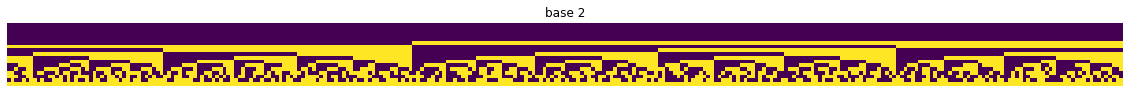

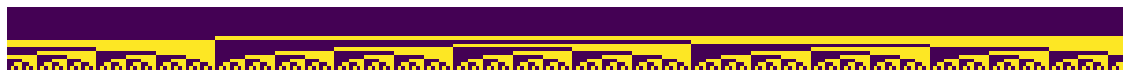

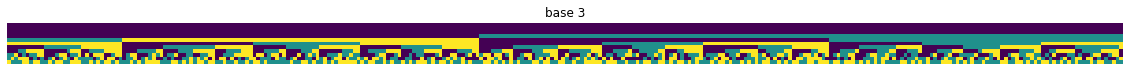

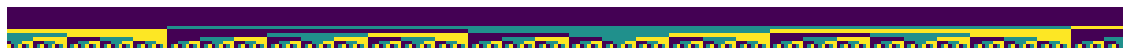

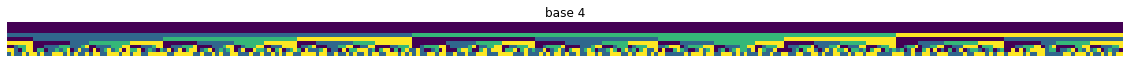

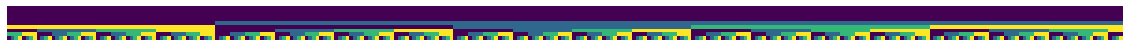

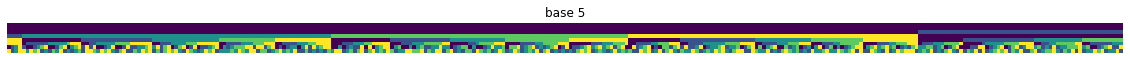

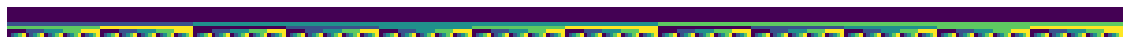

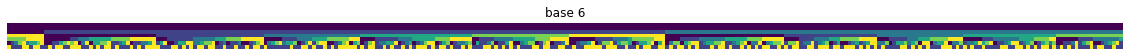

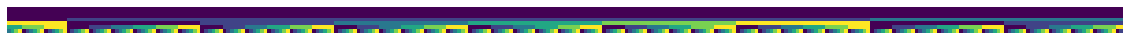

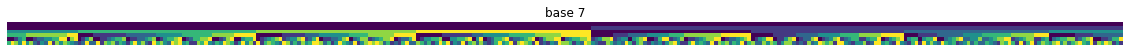

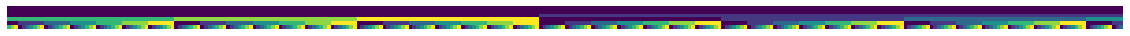

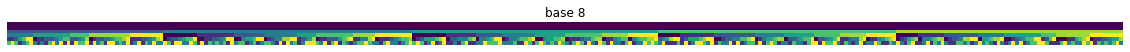

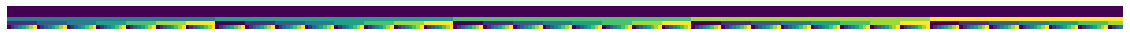

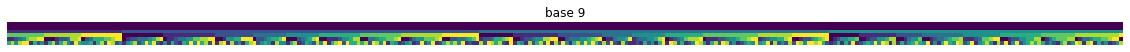

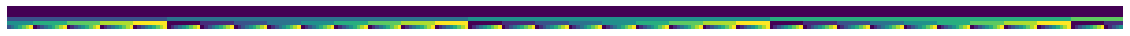

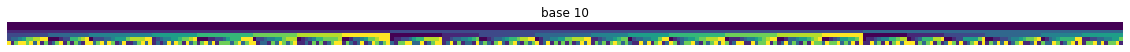

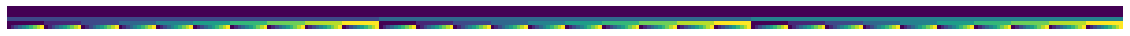

In [166]:
def plot_prime_im(base, ix:[i1,i2], plot_control=True):
    i1, i2 = ix
    
    max_len = len(to_basen(primes[-1], base))
    im = np.array([int_arr(to_basen(n, base), max_len) for n in primes])
    plt.figure(figsize=(20,10))
    plt.imshow(im[i1:i2,:].T)
    plt.title(f'base {base}')
    plt.axis('off')
    # plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0);  plt.margins(0, 0)
    plt.show()

    if plot_control:
        # 'control' (first n numbers)
        bins = np.array([int_arr(to_basen(i, base), max_len) for i in range(len(primes))])
        plt.figure(figsize=(20,10))
        plt.imshow(bins[i1:i2,:].T)
        plt.axis('off')
        # plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0);  plt.margins(0, 0)
        plt.show()
        
for b in range(2, 11):
    plot_prime_im(b, [200,500])